In [1]:
import PIL.Image
import cv2
import IPython.display
import time
from zumi.zumi import Zumi
from zumi.util.camera import Camera
from zumi.util.vision import Vision
from zumi.util.screen import Screen

zumi = Zumi()
screen = Screen()
camera = Camera()

#new zumi util object
vision = Vision()

Starting Zumi 1.4 TESTING VERSION
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
OLED Screen detected
Gyroscope & Accelerometer detected


# New IR methods
you can now use these methods 
to find the specific IR values
without memorizing the index

In [2]:
zumi.get_all_IR_data()

print("Front left ",zumi.front_left_detect())
print("Front right ",zumi.front_right_detect())
print("Bottom left ",zumi.bottom_left_detect())
print("Bottom Right ",zumi.bottom_right_detect())
print("Back left ",zumi.back_left_detect())
print("Back right ",zumi.back_right_detect())

Front left  True
Front right  False
Bottom left  False
Bottom Right  False
Back left  False
Back right  False


In [3]:
#you can also now read the ir value 
#with a string parameter
print(zumi.read_IR("front_left"))
print(zumi.boolean_IR("front_left"))

79
True


# New calibrate method

In [4]:
#this is a new easy to use calibration method
#just an extra redundant function to zumi.mpu.calibrate_MPU()
zumi.gyro_calibrate()

Creating new offset file...
.
.


# New camera methods

In [6]:
#display the frame on the screen
try:
    camera.start_camera()
    for i in range(10):
        image=camera.capture()
        screen.show_image(image)
finally:        
    camera.close()
    print("done")

Starting PiCamera
Closing PiCamera
done


In [7]:
#display the frame on jupyter
try:
    camera.start_camera()
    for i in range(10):
        image=camera.capture()
        #new simple to use jupyter displaying method
        camera.show_image(image)
        camera.clear_output()
finally:        
    camera.close()

Closing PiCamera


In [81]:
#finding a QR code
try:
    camera.start_camera()
    for i in range(20):#take 100 frames
        time_start = time.time()
        image = camera.capture()
        vision.find_QR_code(image)
        camera.show_image(image)
        camera.clear_output()
finally:
    camera.close()
    print("done")

Closing PiCamera
done


In [9]:
#you can also now find colored objects
try:
    camera.start_camera()
    for i in range(50):
        time_start = time.time()
        image = camera.capture()
        vision.find_yellow_object(image)
        camera.show_image(image)
        camera.clear_output()
finally:
    camera.close()
    print("done")

Closing PiCamera
done


KeyboardInterrupt: 

In [13]:
#you can find the objects location
#it is returned as list if 
#it does find the object
#it always returns the largest object found
try:
    camera.start_camera()
    for i in range(40):
        image=camera.capture()
        data = vision.find_green_object(image)
        if data is not None:
            x = data[0]
            y = data[1]
            width = data[2]
            height = data[3]
        camera.show_image(image)
        camera.clear_output()
finally:        
    camera.close()
    print("done")

Closing PiCamera
done


Starting PiCamera
Saved photo at: /home/pi/Dashboard/user/Thomas/test.jpg
Closing PiCamera
done


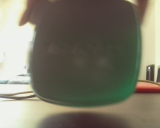

In [12]:
#you can also saves image in your folders
try:
    #start the camera
    camera.start_camera()
    
    #test to see the camera save_photo working
    camera.save_photo("test")
finally:
    camera.close()
    print("done")
IPython.display.Image("test.jpg")

Starting PiCamera
Saved photo at: /home/pi/Dashboard/user/Thomas/test2.jpg
Closing PiCamera
done


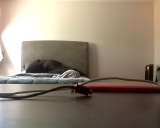

In [14]:
try:
    camera.start_camera()
    
    #take a picture
    image = camera.capture()

    #this is for saving images you have already taken 
    #or if you want save modified images
    camera.save_image(image,"test2")
finally:
    camera.close()
    print("done")
IPython.display.Image("test2.jpg")

# New screen methods
new screen methods include drawing methods that allow for the additive drawing of shaped and pixels on the "draw image".

In [20]:
#here we will make some rectangles
#(x,y,width,height)
#the x and y are the top left corner of the rectangle
screen.draw_rect(10,0,20,10)


In [21]:
#this method will clear the previous drawing but not display anything
#think of this as "clearing the memory" of what will be drawn
screen.clear_drawing()

#this will NOT CLEAR the screen.

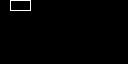

In [22]:
#draw the same rectangle
screen.draw_rect(10,0,20,10)

#but we will display the image on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

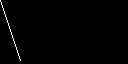

In [23]:
screen.clear_drawing()

#here we will draw a line
#(x1,y1,x2,y2) draws a line between points
screen.draw_line(0,0,20,60)

#we will display the image on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

In [24]:
screen.clear_drawing()

#draws a triangle given 3 points (x,y)
screen.draw_triangle(10,20,30,40,10,40)

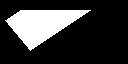

In [25]:
screen.clear_drawing()

#set of 4 points for the polygon (x,y)
points = [(30,50),(90,10),(20,10),(5,20)]
#will draw a polygon
screen.draw_polygon(points)

#display the image on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

# animating with loops

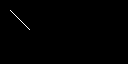

In [26]:
#will clear the previous drawing but not display anything
screen.clear_drawing()

#draw a bunch of points stacked on the same draw image
for i in range(20):
    #draw new point on screen
    screen.draw_point(10+i,10+i)
    
    #display on jupyter as well
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

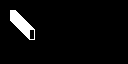

In [27]:
screen.clear_drawing()

for i in range(20):
    #this will both draw a rectangle and display it
    screen.draw_rect(10+i,10+i,5,10)
    
    #display on jupyter
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

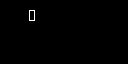

In [36]:
#creating a moving rectangle

screen.clear_drawing()
for i in range(20):
    #this wipes away the drawing
    screen.clear_drawing()
    #this will both draw a rectangle and display it
    screen.draw_rect(10+i,10,5,10)
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

# Curves

In [31]:
screen.clear_drawing()

#(x,y, width, height) of the ellipse
#x and y is the top left corner 
#of a rectangle that encloses the ellipse
screen.draw_ellipse(60,0,30,10)

In [32]:
screen.clear_drawing()

#draw a circle with no infill
#parameters (x,y,diameter-width,fill-in)
#x and y is the top left corner 
#of a box that encloses the circle
screen.draw_circle(10,0,20,fill_in=False)

In [33]:
screen.clear_drawing()

#draw a circle with infill
screen.draw_circle(10,0,20,fill_in=True)

In [34]:
screen.clear_drawing()

#parameters (x1,y1,x2,y2,start_ang,end_ang)
#x1 and y1 is the top left corner 
#and x2 and y2 bottom right corner
#of rectangle that encloses the ellipse
#the start_ang is the starting angle and
#the end_ang is ending angle.
screen.draw_chord(0,0,20,60,0,180)

In [35]:
screen.clear_drawing()

#parameters (x1,y1,x2,y2,start_ang,end_ang)
#x1 and y1 top left corner 
#x2 and y2 bottom right corner
#of rectangle that encloses the ellipse
#the start_ang is the starting angle 
#the end_ang is ending angle of the arc
screen.draw_arc(0,0,20,20,0,180)

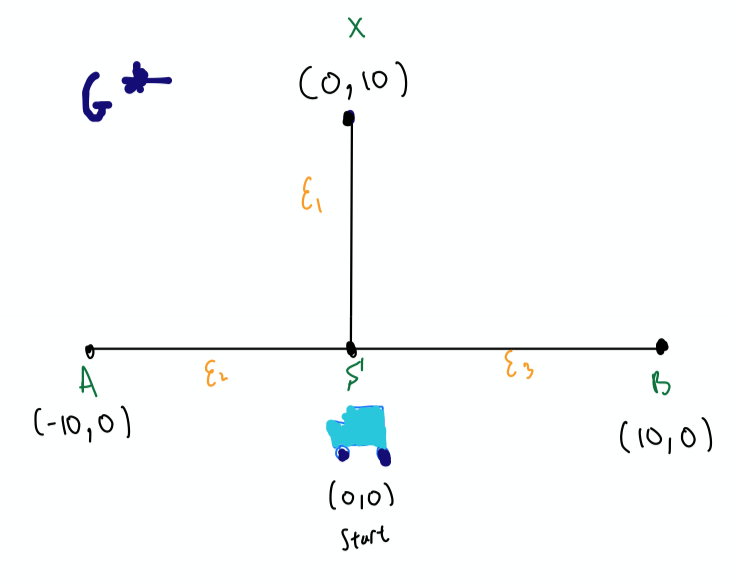

In [3]:
import PIL.Image
import IPython.display
IPython.display.Image("simpleG.jpg")